In [ ]:
 !pip install pandas
 !pip install numpy
 !pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data berat badan.csv')

label:
1. 0- Extremely week
2. 1- Weak
3. 2- Normal
4. 3- Overweight
5. 4- Obesity
6. 5- Extreme Obesity

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data berat badan.csv',index_col=0)
df

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,Laki laki,174,96,4
1,Laki laki,189,87,2
2,Perempuan,185,110,4
3,Perempuan,195,104,3
4,Laki laki,149,61,3
...,...,...,...,...
495,Perempuan,150,153,5
496,Perempuan,184,121,4
497,Perempuan,141,136,5
498,Laki laki,150,95,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jenis Kelamin  500 non-null    object
 1   Tinggi Badan   500 non-null    int64 
 2   Berat Badan    500 non-null    int64 
 3   Label          500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 19.5+ KB


In [ ]:
df.shape

(500, 4)

In [ ]:
df.Label.value_counts()

Label
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

## 2. Cleaning Data

In [ ]:
df.isnull().sum()

Jenis Kelamin    0
Tinggi Badan     0
Berat Badan      0
Label            0
dtype: int64

In [ ]:
df.duplicated().sum()

11

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(489, 4)

## 3.Exploratory Data Analysis (EDA)

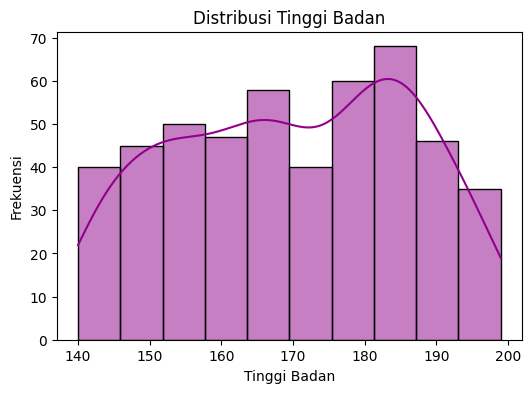

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Tinggi Badan', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show() # Call the show function to display the plot

In [ ]:
import plotly.express as px # Import Plotly Express with the alias 'px'

fig = px.sunburst(df, path=['Jenis Kelamin', 'Label'], values=df.value_counts().values, color_discrete_sequence=['#FF1493', '#00BFFF'])
fig.show()

## 4. Preperation Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

jk_encoder = LabelEncoder()

df['Jenis Kelamin'] = jk_encoder.fit_transform(df['Jenis Kelamin'])

<ipython-input-18-4dd57dabb307>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [ ]:
x = df.drop(columns=['Label'])
y = df['Label']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (489, 3)
y :  (489,)


In [ ]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5. Modeling & Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree : {:.2f}%'.format(decision_tree_acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.76      0.87      0.81        15
           3       0.67      0.67      0.67         9
           4       0.84      0.76      0.80        34
           5       0.87      0.92      0.89        36

    accuracy                           0.82        98
   macro avg       0.77      0.70      0.72        98
weighted avg       0.82      0.82      0.81        98

Akurasi Model Decision Tree : 81.63%


## 6. Testing

In [ ]:
import pandas as pd # Import the pandas library

In [ ]:
new_data = pd.DataFrame({
    'Jenis Kelamin': ["Perempuan"],
    'Tinggi Badan': [168],
    'Berat Badan':[98],
})

In [ ]:
new_data['Jenis Kelamin'] = jk_encoder.transform(new_data['Jenis Kelamin'])

In [ ]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("Prediksi BMI:", prediction[0])

Prediksi BMI: 4


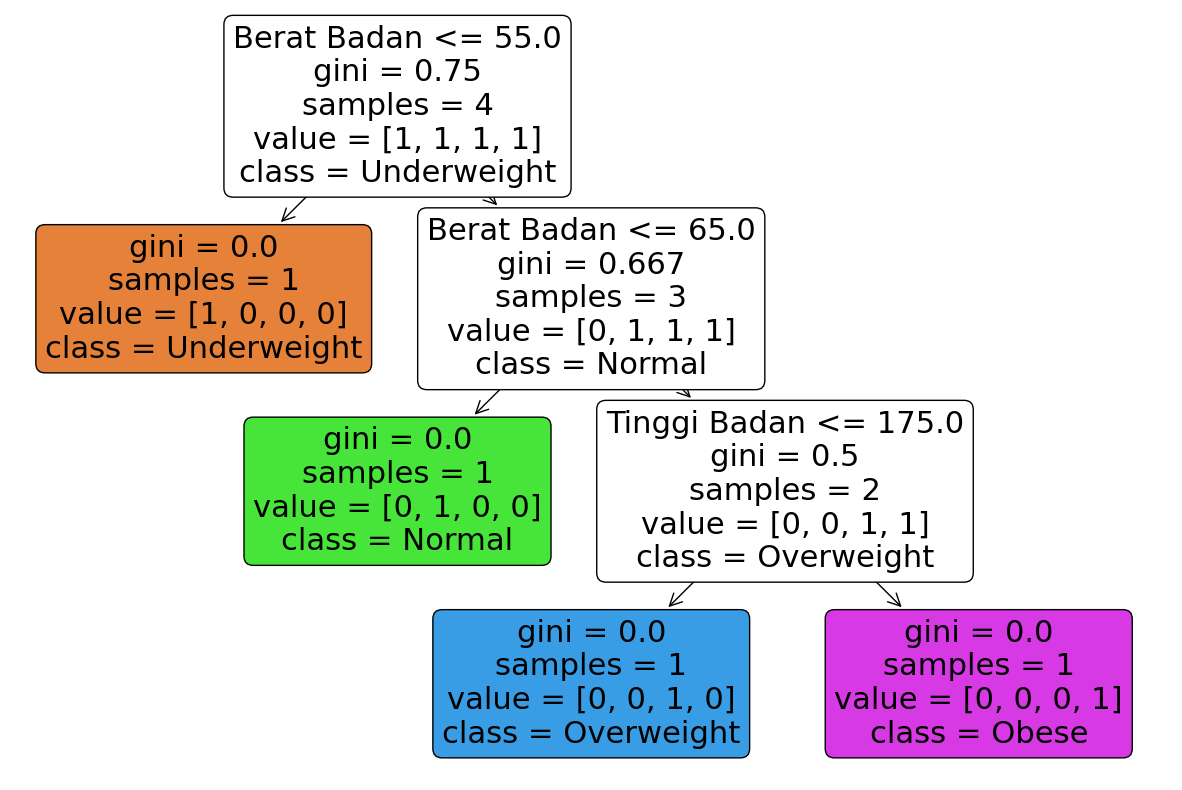

In [ ]:
# Pertama, instal matplotlib jika belum terinstal (hanya di Jupyter Notebook)
# !pip install matplotlib

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Misalkan 'clf' adalah model DecisionTreeClassifier yang sudah terlatih
clf = DecisionTreeClassifier()
# Buat beberapa data contoh untuk melatih model (untuk demonstrasi)
X = [[0, 150, 50], [1, 160, 60], [0, 170, 70], [1, 180, 80]]
y = [0, 1, 2, 3]  # Class labels (Underweight, Normal, Overweight, Obese)
clf.fit(X, y)

# Gunakan nama kelas yang sebenarnya
class_names_actual = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Plot pohon keputusan
plt.figure(figsize=(15,10))
plot_tree(clf,
          feature_names=['Jenis Kelamin', 'Tinggi Badan', 'Berat Badan'],
          class_names=class_names_actual, # Gunakan nama kelas yang sebenarnya
          filled=True,
          rounded=True)
plt.show()


In [ ]:
!pip install joblib

import joblib

# ... (your existing code for training the Decision Tree)

# Save the model
filename = 'decision_tree_model.joblib'
joblib.dump(clf, filename)


['decision_tree_model.joblib']